Ceneo Analyzer

1. Import bibliotek

In [19]:
import os
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


2. Lista kodów produktów o których zostały pobrane opinie 

In [9]:
print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep="\n")

84514582


3. Wczytanie opinii o wskazanym produkcie 

In [10]:
product_id = input("Podaj kod produktu z Ceneo.pl: ")
opinions = pd.read_json(f"opinions/{product_id}.json")
opinions.rating = opinions.rating.apply(lambda r: r.split("/")[0].replace(",",".")).astype(float)

4. Podstawowe statystyki

In [11]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
average_rating = opinions.rating.mean()

5. Histogram ocen produktów

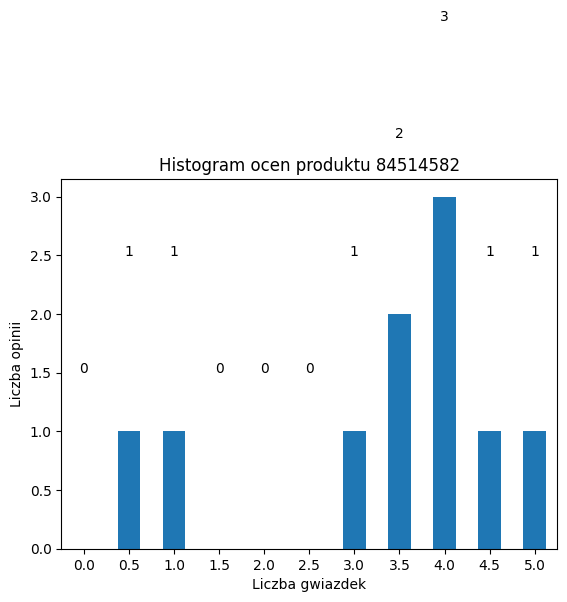

In [13]:
rating_distribution = opinions.rating.value_counts().reindex(np.arange(0,5.5,0.5),fill_value=0)
rating_distribution.plot.bar()
plt.title(f"Histogram ocen produktu {product_id}")
plt.xlabel("Liczba gwiazdek")
plt.ylabel("Liczba opinii")
plt.xticks(rotation=0)
for index, value in enumerate(rating_distribution):
    plt.text(index,value+1.5, str(value), ha="center")

6. Wykres udziału rekomendacji w opiniach o produkcie 

Text(0.5, 1.0, 'Udział rekomendacji w opiniacho produkcie 84514582')

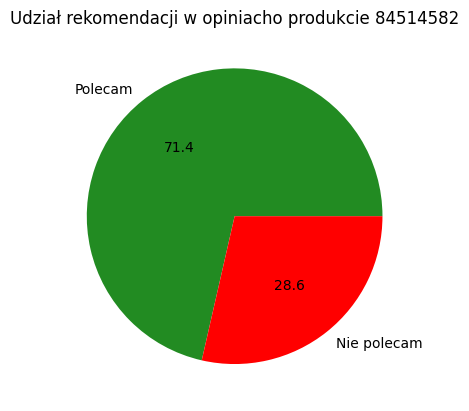

In [15]:
recomendation_distributions = opinions.recomendation.value_counts(dropna=False).reindex(["Polecam","Nie polecam","Nie mam zdania"],fill_value=0)
recomendation_distributions.plot.pie(
    label = "",
    autopct = lambda r: f"{r:1.1f}" if r>0 else "",
    labels = ["Polecam","Nie polecam","Nie mam zdania"],
    colors= ["forestgreen","red","grey"]
)
plt.title(f"Udział rekomendacji w opiniacho produkcie {product_id}")

In [16]:
stats = {
    "product_id": product_id,
    "opinions_count": opinions_count,
    "pros_count": int(pros_count),
    "cons_count": int(cons_count),
    "average_rating": average_rating,
    "rating_distribution": rating_distribution.to_dict(),
    "recomendation_distributions": recomendation_distributions.to_dict()
}

In [20]:
if not os.path.exists("stats"):
    os.mkdir("stats")
with open(f"stats/{product_id}.json", "w", encoding="UTF-8") as jf:
    json.dump(stats, jf, indent=4, ensure_ascii=False)